In [8]:
from qiskit import QuantumRegister,QuantumCircuit
import numpy as np
import matplotlib
import qiskit.extensions as ex
from math import pi,sqrt
from qiskit.visualization import plot_state_city, plot_state_qsphere
from qiskit.aqua.components.optimizers import COBYLA, Optimizer
import matplotlib.pyplot as plt

In [9]:
from qiskit import Aer, execute
simulator = Aer.get_backend('statevector_simulator')

In [10]:
def makeOddGate(i,theta):
    '''Add dicstrings here'''
    qc = QuantumCircuit(4,name='U'+str(i))
    
    for j,theta_ in enumerate(theta):
        qc.rx(theta_,j)
        
    return qc

In [11]:
def makeEvenGate(i,theta):
    qc = QuantumCircuit(4,name='U'+str(i))
    
    for i,theta_ in enumerate(theta):
        qc.rz(theta_,i)
    
    for i in range(4):
        for j in range(i+1,4):
            qc.cz(i,j)
            
    return qc

In [12]:
def applyLayer(i,qc,theta_1,theta_2):
    qc.append(makeOddGate(2*i+1,theta_1),range(4))
    qc.append(makeEvenGate(2*i+2,theta_2),range(4))
    qc.barrier()
    return qc

In [13]:
def funcToMin(theta,layers,rand_state_vector):
    
    reg = QuantumRegister(4)
    qc = QuantumCircuit(reg)
        
    for i in range(layers):
        theta_1 = theta[(8*i):(8*i)+4]
        theta_2 = theta[(8*i)+4:(8*i)+8]
        qc = applyLayer(i,qc,theta_1,theta_2)
        
    result = execute(qc,simulator).result()
    statevector = result.get_statevector(qc)
    
    
    return sqrt(sum(abs(statevector - rand_state_vector)**2))

In [14]:
layers = 5

rand_state_vector = np.random.rand(2**4) + 1j*np.random.rand(2**4)
rand_state_vector = rand_state_vector/sqrt(sum(abs(rand_state_vector)**2))

optimizer = COBYLA(maxiter = 2000)
# optimizer.

x_axis = []
y_axis = []

for i in range(layers):  
    print("working on layer: {}".format(i+1))
    cost_func = COBYLA.wrap_function(funcToMin,(i,rand_state_vector))
    output = optimizer.optimize((i+1)*8,cost_func, initial_point = np.random.uniform(0,2*pi,8*(i+1)))
    x_axis.append(i+1)
    y_axis.append(output[1])
    print(output[1])

working on layer: 1
1.3518796941302413
working on layer: 2
0.8000645283455822
working on layer: 3
0.6935766887198728
working on layer: 4
0.269205173556144
working on layer: 5
0.16890817265445981


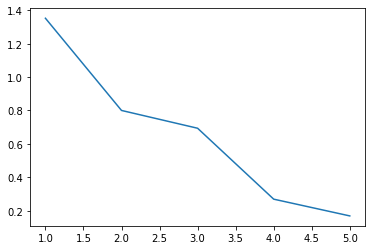

In [15]:
plt.plot(x_axis,y_axis)
plt.show()